<a href="https://colab.research.google.com/github/jcardonamde/reto_cobranzas_sector_financiero/blob/main/cobranzas_sector_financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RETO TECNOLÓGICO DATA SCIENCE NIVEL BÁSICO <br/>TALENTO ESPECIALIZADO SAPIENCIA – COHORTE 4**


## Proyecto Cobranza en sector financiero

<br>

**Descripción:**

El caso de uso de sector financiero expone un proceso de cobranza a clientes que actualmente se encuentran en mora (*no pago*) de su obligación financiera (*crédito*). Allí se registra en cada fila la gestión desarrollada por el abogado y el resultado de la gestión. Es importante analizar las causales principales de incumplimiento y definir estrategias de recuperación de la cartera con base en los perfiles de cliente identificados.

<br>
<br>

**Objetivo:**

Demostrar conocimientos y habilidades como científico de datos, identificando y analizando los patrones en los datos para, a partir de estos, construir modelos descriptivos y predictivos que apoyen la toma de decisiones con base en los datos, con el fin de lograr los objetivos de negocio corporativos y llevar la estrategia hacia una compañía data-driven.

<br>

* **Diccionario de los datos:**

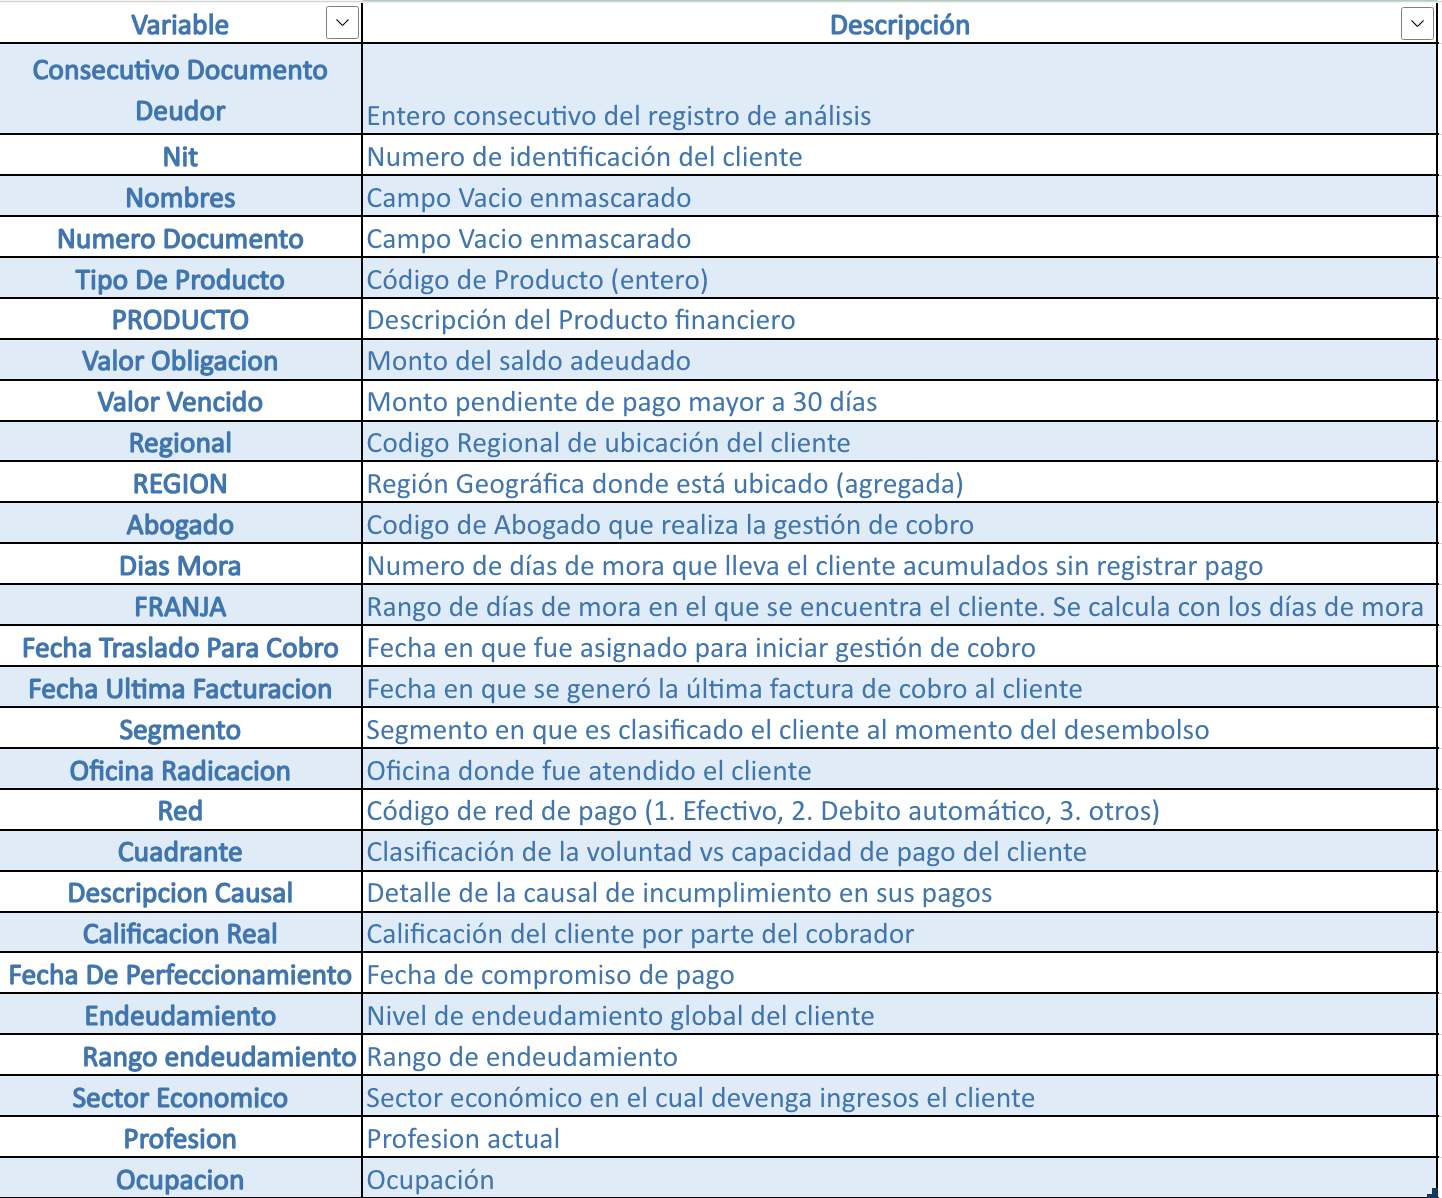



## Análisis exploratorio de los datos

Importar libreria y dataset


In [365]:
# Habilito la opción de poder cargar los datos desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [366]:
# Importamos libreria y ruta del dataset
import pandas as pd
filename = '/content/drive/MyDrive/Reto DS Eafit/Caso 01 - Cobranza Sector Financiero.xlsx'
data = pd.read_excel(filename)
data.head()

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,Abogado,Dias Mora,FRANJA,Fecha Traslado Para Cobro,Fecha Ultima Facturacion,Segmento,Oficina Radicacion,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,27314049,6408,NaN,NaN,3,TARJETAS DE CREDITO,1675782.0,451144.0,2099,BOGOTA,109978,60,31-60,2015-05-24,2015-06-19 00:00:00,PERSONAL PLUS,202,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,1,2005-11-25,3051820.0,2015-01-01 00:00:00,NaN,ABOGADO,JUBILADO
1,19894495,38856,NaN,NaN,16,VEHICULOS SUFI,13833384.0,1357457.0,2099,BOGOTA,109978,24,<30,2015-06-04,2015-06-01 00:00:00,PERSONAS,31,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,3,2011-10-31,13833384.0,2015-01-01 00:00:00,NaN,ABOGADO,INDEPENDIENTE
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,109978,60,31-60,2015-05-31,2015-06-26 00:00:00,PERSONAS,813,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,2015-01-01 00:00:00,NaN,SIN PROFESION,JUBILADO
3,25245616,110055,NaN,NaN,16,VEHICULOS SUFI,27960592.0,3593669.0,2099,BOGOTA,109976,105,91-120,2015-06-13,2015-06-10 00:00:00,MICROPYME,675,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,2013-07-10,27960592.0,15-50,NaN,ABOGADO,INDEPENDIENTE
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,109978,48,31-60,2015-05-29,0001-01-01 BC,PERSONAL PLUS,57,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA


In [367]:
# Inicialmente identifico la forma del set de datos
data.shape

(89247, 27)

Con lo anterior puedo entender que este set de datos se compone de 27 columnas y 89.247 filas

In [368]:
# Igualmente, examino el número de valores únicos entre las columnas con las cuales estamos trabajando
data.nunique()

Consecutivo Documento Deudor    89247
Nit                             74657
Nombres                             0
Numero Documento                    0
Tipo De Producto                   23
PRODUCTO                            6
Valor Obligacion                88515
Valor Vencido                   84205
Regional                           33
REGION                              5
Abogado                             4
Dias Mora                         571
FRANJA                              6
Fecha Traslado Para Cobro         257
Fecha Ultima Facturacion          201
Segmento                            4
Oficina Radicacion                672
Red                                 3
Cuadrante                           6
Descripcion Causal                 53
Calificacion Real                   4
Fecha De Perfeccionamiento       4368
Endeudamiento                   74331
Rango endeudamiento                 6
Sector Economico                   22
Profesion                          85
Ocupacion   

Aquí podemos identificar particularmente de que las columnas de Nombres y Número Documento no tienen ningún dato único. Esto lo que nos da a entender es que tengamos datos faltantes allí.

Posteriormente, voy a identificar los tipos de datos que componen cada columna al igual confirmar de si se tienen valores faltantes.

In [369]:
# Reviso el número y tipo de dato por Columna, al igual que los datos faltantes que se tengan
print(data.info(), '\n')
print(data.isna().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89247 entries, 0 to 89246
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Consecutivo Documento Deudor  89247 non-null  int64         
 1   Nit                           89247 non-null  int64         
 2   Nombres                       0 non-null      float64       
 3   Numero Documento              0 non-null      float64       
 4   Tipo De Producto              89247 non-null  int64         
 5   PRODUCTO                      89247 non-null  object        
 6   Valor Obligacion              89247 non-null  float64       
 7   Valor Vencido                 89247 non-null  float64       
 8   Regional                      89247 non-null  int64         
 9   REGION                        89247 non-null  object        
 10  Abogado                       89247 non-null  int64         
 11  Dias Mora                   

<Axes: >

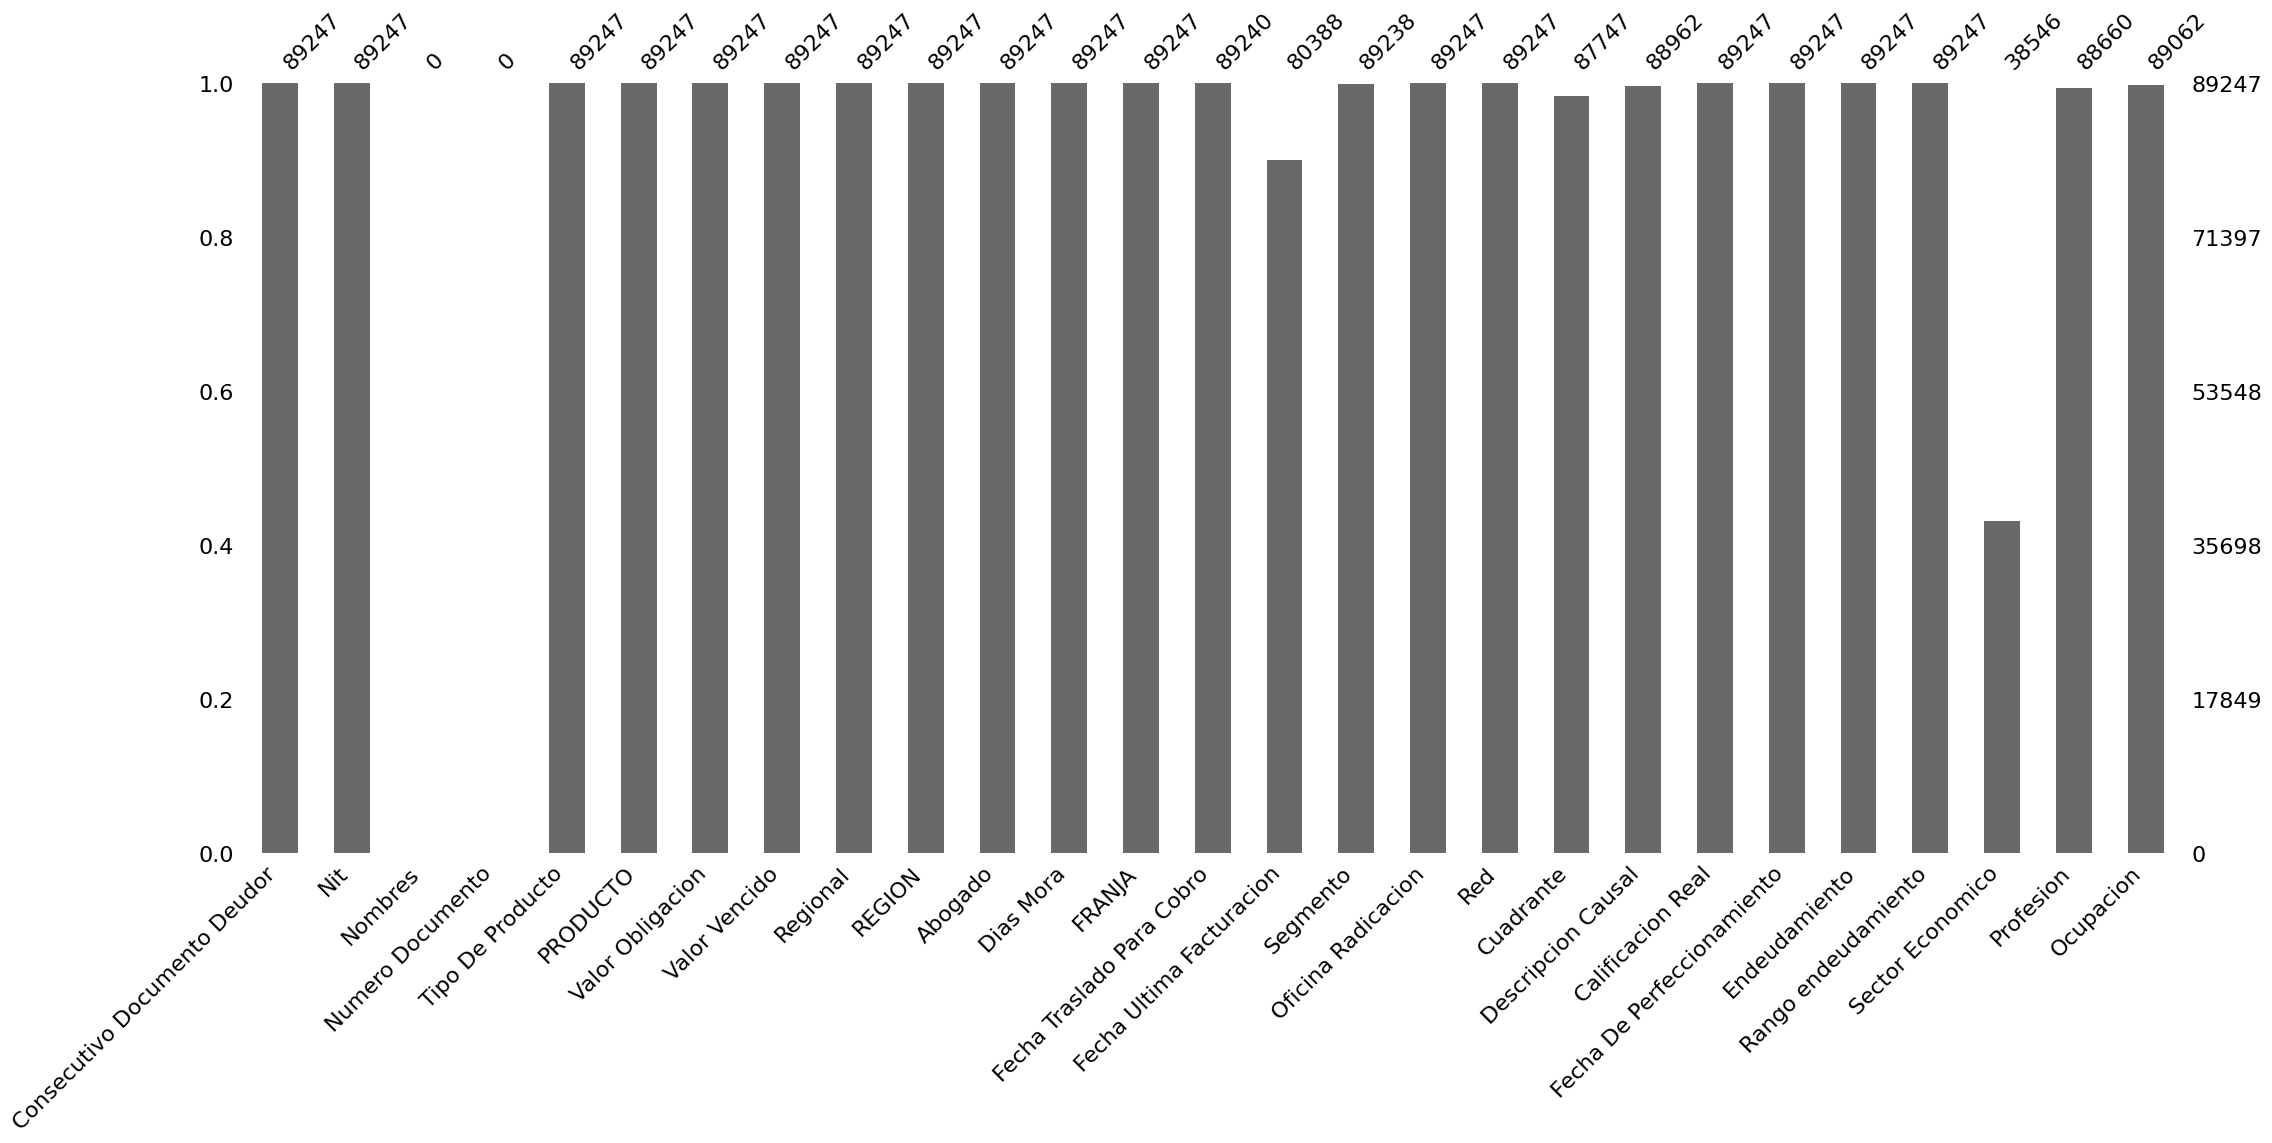

In [370]:
# Aplico una visualización de dichos datos nulos por columna apoyandome en la libreria missingno
import missingno as msno
msno.bar(data)

Podemos ver que las columnas que tienen datos faltantes son:

*   Nombres
*   Numero Documento
*   Fecha Traslado Para Cobro
*   Fecha Ultima Facturacion
*   Segmento
*   Cuadrante
*   Descripcion Causal
*   Sector Economico
*   Profesion
*   Ocupacion

En este punto puedo inferir que tanto la columna de Nombres y Número Documento no manejan datos por protección de la identidad de los clientes. Por lo que para nuestro análisis no serían necesarias, por lo que las depurare más adelante.

Las demás columnas las analizaré más a fondo para conocer que tanta inherencia relevante tienen en el data set y definir si debería hacer un rellenado de data o finalmente eliminarlas.


In [371]:
print(data.dtypes)

Consecutivo Documento Deudor             int64
Nit                                      int64
Nombres                                float64
Numero Documento                       float64
Tipo De Producto                         int64
PRODUCTO                                object
Valor Obligacion                       float64
Valor Vencido                          float64
Regional                                 int64
REGION                                  object
Abogado                                  int64
Dias Mora                                int64
FRANJA                                  object
Fecha Traslado Para Cobro       datetime64[ns]
Fecha Ultima Facturacion                object
Segmento                                object
Oficina Radicacion                       int64
Red                                      int64
Cuadrante                               object
Descripcion Causal                      object
Calificacion Real                        int64
Fecha De Perf

Aquí puedo identificar que tenemos diferentes tipos de datos, como lo son de tipo numérico (int64, float64), de formato fecha (datetime64) y de tipo objeto.

Esto también se debe tener en cuenta para saber si tenemos que darles un manejo especial para conocer los posibles causales de no pago y tambien para la posterior aplicación de modelos.

In [372]:
# Identifico cuál es la cantidad de datos duplicados y en caso de existir poderlos depurar
data.duplicated()
data.duplicated().sum()

0

Luego del uso del anterior método vemos que está perfecto, ya que al momento no contamos con datos duplicados por depurar. Ahora corregiremos un pequeño detalle en el nombre de las columnas.

In [373]:
# Validar el nombramiento de las columnas
data.columns

Index(['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento',
       'Tipo De Producto', 'PRODUCTO', 'Valor Obligacion', 'Valor Vencido',
       'Regional', 'REGION', 'Abogado', 'Dias Mora', 'FRANJA',
       'Fecha Traslado Para Cobro', 'Fecha Ultima Facturacion', 'Segmento',
       'Oficina Radicacion', 'Red', 'Cuadrante', 'Descripcion Causal',
       'Calificacion Real', 'Fecha De Perfeccionamiento', 'Endeudamiento',
       'Rango endeudamiento', 'Sector Economico', 'Profesion', 'Ocupacion'],
      dtype='object')

Como se puede ver tenemos 3 columnas que estan bajo un formato UPPERCASE diferente al que manejamos en el resto de columnas que es de tipo Capitalize. Procedemos a corregirlo.

In [374]:
# Se crea un diccionario de renombramiento
nuevos_nombres = {
    'PRODUCTO': 'Producto',
    'REGION': 'Region',
    'FRANJA': 'Franja'
}

# Se procede a renombrar las columnas
data.rename(columns=nuevos_nombres, inplace=True)

In [375]:
# Verificamos que el cambio haya quedado aplicado correctamente en las columnas
data.columns

Index(['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento',
       'Tipo De Producto', 'Producto', 'Valor Obligacion', 'Valor Vencido',
       'Regional', 'Region', 'Abogado', 'Dias Mora', 'Franja',
       'Fecha Traslado Para Cobro', 'Fecha Ultima Facturacion', 'Segmento',
       'Oficina Radicacion', 'Red', 'Cuadrante', 'Descripcion Causal',
       'Calificacion Real', 'Fecha De Perfeccionamiento', 'Endeudamiento',
       'Rango endeudamiento', 'Sector Economico', 'Profesion', 'Ocupacion'],
      dtype='object')

En este punto vamos a agrupar en objetos diferentes las variables que son de tipo numérico y categóricas para diferenciarlas.



In [376]:
# Determinar el tipo de datos de cada columna
data_types = data.dtypes

# Crear listas para variables continuas y categóricas
variables_continuas = []
variables_categoricas = []

# Identificando el tipo de cada variable y se clasifica en la lista correspondiente
for column, dtype in data_types.items():  # Usamos items() en lugar de iteritems()
    if dtype == 'object':
        variables_categoricas.append(column)
    else:
        variables_continuas.append(column)

# Se crean objetos para diferenciar las variables continuas y categóricas
df_variables_continuas = data[variables_continuas]
df_variables_categoricas = data[variables_categoricas]

print('Variables Continuas')
print(df_variables_continuas)
print('\n')
print('Variables Categoricas')
print(df_variables_categoricas)

Variables Continuas
       Consecutivo Documento Deudor     Nit  Nombres  Numero Documento  \
0                          27314049    6408      NaN               NaN   
1                          19894495   38856      NaN               NaN   
2                          13587837      23      NaN               NaN   
3                          25245616  110055      NaN               NaN   
4                           2712382      92      NaN               NaN   
...                             ...     ...      ...               ...   
89242                      24892452  787457      NaN               NaN   
89243                      24485118  787459      NaN               NaN   
89244                      27364653  787459      NaN               NaN   
89245                      28482366  787459      NaN               NaN   
89246                      27641335  787459      NaN               NaN   

       Tipo De Producto  Valor Obligacion  Valor Vencido  Regional  Abogado  \
0           


En los anteriores objetos, pudimos identificar particularmente que las variables numéricas, a pesar de tener números en algunas de sus columnas.

Tienen un tipo de comportamiento un poco diferente porque hacen referencia a que podrían requerir una correspondencia con una descripción para ser completamente categórica.

Por ello se decide generar un análisis de las variables numéricas más puras en sentido de que sean discretas o continuas. Para posterior hacer un análisis estadístico de las variables.

In [377]:
# Importo una libreria para darle mejor formato a la tabla y nos permita una mejor intepretación
from google.colab import data_table
data_table.enable_dataframe_formatter()

variables_numericas = data[['Consecutivo Documento Deudor', 'Nit', 'Valor Obligacion', 'Valor Vencido', 'Dias Mora', 'Endeudamiento']]
variables_numericas.describe()

,Consecutivo Documento Deudor,Nit,Valor Obligacion,Valor Vencido,Dias Mora,Endeudamiento
count,8.924700e+04,89247.000000,8.924700e+04,8.924700e+04,89247.000000,8.924700e+04
mean,2.315528e+07,485493.689771,7.069210e+06,7.062807e+05,47.099320,1.432068e+07
std,7.479098e+06,271437.508819,1.519014e+07,1.878659e+06,70.105525,2.916728e+07
min,7.758000e+03,18.000000,1.804400e+04,2.001000e+04,1.000000,1.804400e+04
25%,2.206810e+07,198392.500000,7.655165e+05,1.042480e+05,26.000000,1.292230e+06
50%,2.578647e+07,563959.000000,1.927124e+06,2.419370e+05,30.000000,4.600062e+06
75%,2.827977e+07,740818.500000,5.812533e+06,6.112845e+05,46.000000,1.697418e+07
max,3.016075e+07,787459.000000,6.713357e+08,1.831087e+08,2175.000000,2.012549e+09


Con lo anterior podemos identificar que el promedio de valor de las obligaciones crediticias es de unos 7.069.209 aproximadamente. Tambien que el valor de promedio del valor vencido por obligación es de unos $ 706.280.

Al igual que forma interesante, podemos identificar que el valor mínimo de días en mora es de un día y que hay obligaciones hasta con 2175 días en mora como maximo, como también un promedio de 47 días en mora.

En estas variables numéricas también tuvimos las columnas de Consecutivo Documento Deudor y Nit. Estas no representan una relevancia en nuestro análisis, por lo que en el próximo paso procederemos a eliminarlas para ir reduciendo el data set a lo que nos interesa seguir explorando.

In [378]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento']

# Eliminar las columnas
data = data.drop(columnas_a_eliminar, axis=1)

In [379]:
# Visualizamos el dataset con las primeras columnas depuradas
data_table.enable_dataframe_formatter()
data.head(5)

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,Fecha Ultima Facturacion,Segmento,Oficina Radicacion,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,3,TARJETAS DE CREDITO,1675782.0,451144.0,2099,BOGOTA,109978,60,31-60,2015-05-24,2015-06-19 00:00:00,PERSONAL PLUS,202,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,DESCUIDO,1,2005-11-25,3051820.0,2015-01-01 00:00:00,NaN,ABOGADO,JUBILADO
1,16,VEHICULOS SUFI,13833384.0,1357457.0,2099,BOGOTA,109978,24,<30,2015-06-04,2015-06-01 00:00:00,PERSONAS,31,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,3,2011-10-31,13833384.0,2015-01-01 00:00:00,NaN,ABOGADO,INDEPENDIENTE
2,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,109978,60,31-60,2015-05-31,2015-06-26 00:00:00,PERSONAS,813,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,2015-01-01 00:00:00,NaN,SIN PROFESION,JUBILADO
3,16,VEHICULOS SUFI,27960592.0,3593669.0,2099,BOGOTA,109976,105,91-120,2015-06-13,2015-06-10 00:00:00,MICROPYME,675,3,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESEMPLEADO TITULAR Y/O COTITULAR,3,2013-07-10,27960592.0,15-50,NaN,ABOGADO,INDEPENDIENTE
4,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,109978,48,31-60,2015-05-29,0001-01-01 BC,PERSONAL PLUS,57,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA


Ahora vamos a tratar las columnas que ya conocemos con datos faltantes. Como ya se vio anteriormente, se depuraron las columnas con datos faltantes como lo eran Nombres y Número Documento, ya que para el análisis nos eran necesarios.


Podemos tener presente que las columnas que aún tienen datos faltantes son:

* Fecha Traslado Para Cobro
* Fecha Ultima Facturacion
* Segmento
* Cuadrante
* Descripcion Causal
* Sector Economico
* Profesion
* Ocupacion

Procedemos a darles tratamiento:


In [380]:
# Analizamos los datos faltantes para la columna Fecha Traslado Para Cobro
datos_faltantes_fecha_traslado_cobro = data['Fecha Traslado Para Cobro'].isna().sum()

# Mostrar el contador
print("Cantidad de filas con datos faltantes en 'Fecha Traslado Para Cobro':", datos_faltantes_fecha_traslado_cobro)

Cantidad de filas con datos faltantes en 'Fecha Traslado Para Cobro': 7


In [381]:
# Si revisamos los valores únicos por columna, no nos indica un patrón claro por ser un formato muy diverso como lo son las fechas
data['Fecha Traslado Para Cobro'].value_counts()

2015-06-21    13685
2015-06-28    13611
2015-06-27    11882
2015-06-25     7013
2015-06-23     4848
              ...  
2014-06-10        1
2014-08-08        1
2014-11-29        1
2014-10-07        1
2014-11-17        1
Name: Fecha Traslado Para Cobro, Length: 257, dtype: int64

Como estas 7 filas representan una minoría del conjunto de datos, se toma la decisión de depurarlas.



In [382]:
# Se eliminan las filas con datos faltantes en esa columna
data.dropna(subset=['Fecha Traslado Para Cobro'], inplace=True)

Continuamos analizando la columna **Fecha Ultima Facturacion**

In [383]:
# Analizamos los datos faltantes para la columna Fecha Ultima Facturacion
datos_faltantes_fecha_ultima_facturacion = data['Fecha Ultima Facturacion'].isna().sum()

# Mostrar el contador
print("Cantidad de filas con datos faltantes en 'Fecha Ultima Facturacion':", datos_faltantes_fecha_ultima_facturacion)

Cantidad de filas con datos faltantes en 'Fecha Ultima Facturacion': 8859


In [384]:
# Se realiza un conteo de la columna para identificar un posible patrón, y veo que aun tipo de dato atípico
data['Fecha Ultima Facturacion'].value_counts()

2015-06-26 00:00:00    30700
2015-06-19 00:00:00    24221
2015-06-25 00:00:00    11910
0001-01-01 BC           2195
2015-05-29 00:00:00     1383
                       ...  
2013-08-27 00:00:00        1
2013-06-28 00:00:00        1
2013-12-20 00:00:00        1
2012-02-15 00:00:00        1
2015-02-19 00:00:00        1
Name: Fecha Ultima Facturacion, Length: 201, dtype: int64

En esta columna vemos un volumen más alto de columnas faltantes. Más puntualmente de 8859 filas, para mi consideración son datos importantes. Por lo que se realizara una imputación de los valores faltantes con la fecha más común.

In [385]:
# Imputar Valores Faltantes para la columna Fecha Ultima Facturacion
fecha_mas_comun = data['Fecha Ultima Facturacion'].mode().values[0]
data['Fecha Ultima Facturacion'].fillna(fecha_mas_comun, inplace=True)

Durante el conteo me encontré un valor atípico. El cual voy a revisar mediante un agrupamiento de la misma columna para explorar los valores más a detalle.

In [386]:
# Hago un agrupamiento y sumatoria por la columna de Fecha Ultima Facturacion para analizar
# data.groupby(['Fecha Ultima Facturacion']).sum()

Efectivamente, mediante el conteo de valores y la exploración en el dataframe agrupado. Puedo ver que se tienen unas 2195 filas con el valor 0001-01-01 BC. Que es un formato muy atípico al encontrado en restante de valores de dicha columna.

In [387]:
# Procedo a reemplazar todas las filas del valor '0001-01-01 BC' con la fecha más común
valor_a_reemplazar = '0001-01-01 BC'
data['Fecha Ultima Facturacion'] = data['Fecha Ultima Facturacion'].replace(valor_a_reemplazar, fecha_mas_comun)

In [388]:
# Valido el cambio aplicado de manera correcta
print(data['Fecha Ultima Facturacion'].value_counts())

2015-06-26    41754
2015-06-19    24221
2015-06-25    11910
2015-05-29     1383
2015-06-24     1269
              ...  
2013-08-27        1
2013-06-28        1
2013-12-20        1
2012-02-15        1
2015-02-19        1
Name: Fecha Ultima Facturacion, Length: 200, dtype: int64


Posterior continuo analizando las demás columnas con data faltante

In [389]:
# Analizamos los datos faltantes para las demas columnas
datos_faltantes_Segmento = data['Segmento'].isna().sum()
datos_faltantes_Cuadrante = data['Cuadrante'].isna().sum()
datos_faltantes_Descripcion_Causal = data['Descripcion Causal'].isna().sum()
datos_faltantes_Sector_Economico = data['Sector Economico'].isna().sum()
datos_faltantes_Profesion = data['Profesion'].isna().sum()
datos_faltantes_Ocupacion = data['Ocupacion'].isna().sum()

# Mostrar el contador
print("Cantidad de filas con datos faltantes en 'Segmento':", datos_faltantes_Segmento)
print("Cantidad de filas con datos faltantes en 'Cuadrante':", datos_faltantes_Cuadrante)
print("Cantidad de filas con datos faltantes en 'Descripcion Causal':", datos_faltantes_Descripcion_Causal)
print("Cantidad de filas con datos faltantes en 'Sector Economico':", datos_faltantes_Sector_Economico)
print("Cantidad de filas con datos faltantes en 'Profesion':", datos_faltantes_Profesion)
print("Cantidad de filas con datos faltantes en 'Ocupacion':", datos_faltantes_Ocupacion)

Cantidad de filas con datos faltantes en 'Segmento': 9
Cantidad de filas con datos faltantes en 'Cuadrante': 1500
Cantidad de filas con datos faltantes en 'Descripcion Causal': 285
Cantidad de filas con datos faltantes en 'Sector Economico': 50697
Cantidad de filas con datos faltantes en 'Profesion': 587
Cantidad de filas con datos faltantes en 'Ocupacion': 185


Continuamos analizando la columna **Segmento**

In [390]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Segmento'].value_counts()

PERSONAL PLUS    48421
PERSONAS         26804
MICROPYME         8011
PYMES             5995
Name: Segmento, dtype: int64

Como estas 9 filas representan una minoría del conjunto de datos, se toma la decisión de depurarlas.

In [391]:
# Se eliminan las filas con datos faltantes en esa columna
data.dropna(subset=['Segmento'], inplace=True)

In [392]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Cuadrante'].value_counts()

TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA    33211
TIENE VOLUNTAD Y TIENE CAPACIDAD             27117
SIN CUADRANTE                                20993
NO TIENE VOLUNTAD Y TIENE CAPACIDAD           5789
TIENE VOLUNTAD Y NO TIENE CAPACIDAD            565
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD          56
Name: Cuadrante, dtype: int64

In [393]:
# Se realiza un agrupamiento de la columna Cuadrante para hacer un análisis de la sumatoria entre filas de cada columna del data set
data.groupby(['Cuadrante']).sum()

<ipython-input-393-95b1c6d0aedc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Cuadrante']).sum()


,Tipo De Producto,Valor Obligacion,Valor Vencido,Regional,Abogado,Dias Mora,Oficina Radicacion,Red,Calificacion Real,Endeudamiento
Cuadrante,,,,,,,,,,
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD,1084,2.795268e+08,1.325325e+07,165444,6158764,1348,21209,95,88,6.867301e+08
NO TIENE VOLUNTAD Y TIENE CAPACIDAD,78221,4.517672e+10,5.406751e+09,21761813,636658858,387565,2526433,7467,11058,9.268114e+10
SIN CUADRANTE,167481,7.090113e+10,7.624815e+09,73355165,2308758983,732831,10374398,22095,29173,1.807230e+11
TIENE VOLUNTAD Y NO TIENE CAPACIDAD,11641,4.138901e+09,8.019115e+08,2133036,62137062,50879,243413,767,1166,1.192099e+10
TIENE VOLUNTAD Y TIENE CAPACIDAD,297853,2.054254e+11,1.631845e+10,96507336,2982267745,919807,11530143,37116,46149,4.038478e+11
TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,432791,2.942678e+11,3.209211e+10,121658817,3652458223,2065889,14315489,45323,63483,5.709602e+11


Aquí por mencionarlo vemos algo muy particular y es que en el cuadrante de 'TIENE VOLUNTAD Y TIENE CAPACIDAD' son el que poseen un mayor número de valor obligación por sumatoria. Sería algo a tener presente para un posterior análisis.

In [394]:
# Realizo un filtrado por los valores faltantes de la columna Cuadrante para validar en el dataframe como se ven las columnas
cuadrante_missing = data['Cuadrante'].isna()
data.loc[cuadrante_missing,:]

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,Fecha Ultima Facturacion,Segmento,Oficina Radicacion,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
95,94,MASIVO SUFI,2976185.00,67863.00,2099,BOGOTA,109978,8,<30,2015-06-20,2015-06-17,PERSONAS,31,3,NaN,DESCUIDO,2,2014-08-19,2976185.00,2015-01-01 00:00:00,NaN,ABOGADO,JUBILADO
121,3,TARJETAS DE CREDITO,437013.00,230050.00,2099,BOGOTA,109978,30,<30,2015-06-21,2015-06-19,PERSONAL PLUS,640,1,NaN,NaN,1,2013-10-11,501190.00,<1M,NaN,ACTOR - ARTISTA,SIN OFICIO
213,6,CONSUMO,7144564.00,387025.00,2099,BOGOTA,109970,36,31-60,2015-06-25,2015-06-26,PERSONAL PLUS,668,1,NaN,NaN,1,2012-02-02,11199235.00,2015-01-01 00:00:00,NaN,ADMINISTRADOR,EMPLEADO SECTOR PRIVADO
320,16,VEHICULOS SUFI,18521029.00,1610919.00,2099,BOGOTA,109978,2,<30,2015-06-26,2015-06-23,PERSONAL PLUS,281,3,NaN,DESCUIDO,1,2013-12-23,22780927.00,15-50,NaN,ADMINISTRADOR,EMPLEADO SECTOR PRIVADO
324,3,TARJETAS DE CREDITO,18217955.00,18217955.00,1099,ANTIOQUIA,109976,360,>180,2015-01-17,2015-06-19,PERSONAL PLUS,245,1,NaN,CHEQUE DEVUELTO POR LA ENTIDAD,3,2013-12-11,37614570.00,15-50,NaN,ARBITRO,SIN OFICIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88805,3,TARJETAS DE CREDITO,706001.00,140635.00,2099,BOGOTA,109978,30,<30,2015-06-27,2015-06-25,PERSONAL PLUS,332,1,NaN,NaN,1,2012-07-03,706001.00,<1M,NaN,NaN,NaN
88806,3,TARJETAS DE CREDITO,755606.00,36632.00,2099,BOGOTA,109978,30,<30,2015-06-28,2015-06-26,PERSONAL PLUS,662,1,NaN,NaN,1,2012-07-03,830487.00,<1M,NaN,NaN,NaN
88810,3,TARJETAS DE CREDITO,3676296.00,764202.00,2099,BOGOTA,109978,30,<30,2015-06-28,2015-06-26,PERSONAL PLUS,652,1,NaN,NaN,1,2008-05-16,6964622.00,2015-01-01 00:00:00,NaN,NaN,NaN
88845,3,TARJETAS DE CREDITO,716664.00,716664.00,4099,CARIBE,109976,120,91-120,2015-06-23,2015-06-19,PERSONAS,434,1,NaN,INGRESOS INSUFICIENTES,3,2013-04-18,716664.00,<1M,NaN,ARBITRO,SIN OFICIO


Revisando la tabla de valores faltantes para la columna Cuadrante. Hemos identificado un patrón relacionado a la columna Franja. Donde hemos visto que los valores que mas se repiten de forma común respecto a las filas de los cuadrante faltantes manejan una franja de '<30'

In [395]:
# Filtrar las filas con valores faltantes en la columna 'Cuadrante'
cuadrante_missing = data['Cuadrante'].isna()
filas_con_cuadrante_faltante = data.loc[cuadrante_missing, :]

# Obtener el valor que más se repite en 'Franakja' para las filas con valores faltantes en 'Cuadrante'
valor_mas_comun = filas_con_cuadrante_faltante['Franja'].mode().values[0]

# Mostrar el valor más común
print("Valor más común en 'Franja':", valor_mas_comun)


Valor más común en 'Franja': <30


Hacemos un conteo para ver cuantas de las 1500 filas con cuadrante faltante estan relacionadas a la franja de valor <30.

In [396]:
# Filtrar las filas con valores faltantes en la columna 'Cuadrante'
cuadrante_missing = data['Cuadrante'].isna()
filas_con_cuadrante_faltante = data.loc[cuadrante_missing, :]

# Contar cuántas de estas filas tienen '<30' en 'Franja'
conteo = filas_con_cuadrante_faltante['Franja'].str.contains('<30').sum()

# Mostrar el conteo
print("Cantidad de filas con 'Franja' de <30 en 'Cuadrante':", conteo)

Cantidad de filas con 'Franja' de <30 en 'Cuadrante': 1309


Hemos visto que de esas 1500 filas coinciden 1309, ahora deberíamos definir si las llenamos con alguno de los valores de cuadrante que más estén asociados a la columna franja.

In [397]:
# Filtrar el DataFrame para incluir solo las filas donde 'FRANJA' es '<30'
filtrado_por_franja = data[data['Franja'] == '<30']

# Encontrar los valores más comunes en la columna 'Cuadrante' en el DataFrame filtrado
valores_mas_comunes_cuadrante = filtrado_por_franja['Cuadrante'].value_counts()

# Mostrar los valores más comunes
print(valores_mas_comunes_cuadrante)

TIENE VOLUNTAD Y TIENE CAPACIDAD             21837
TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA    18983
SIN CUADRANTE                                18026
NO TIENE VOLUNTAD Y TIENE CAPACIDAD           2942
TIENE VOLUNTAD Y NO TIENE CAPACIDAD            212
NO TIENE VOLUNTAD Y NO TIENE CAPACIDAD          51
Name: Cuadrante, dtype: int64


Obtenemos que el valor de cuadrante que mejor se correlaciona con nuestro analisis es 'TIENE VOLUNTAD Y TIENE CAPACIDAD'.

Por ende procederemos a llenar las filas faltantes con dicho valor.

In [398]:
# Valor a utilizar para el relleno
valor_a_rellenar_cuadrante = 'TIENE VOLUNTAD Y TIENE CAPACIDAD'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Cuadrante'].fillna(valor_a_rellenar_cuadrante, inplace=True)

In [399]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Descripcion Causal'].value_counts()

DESCUIDO                                             24911
SIN CAUSAL DE MORA                                   20284
CUENTAS POR COBRAR                                    7882
CALAMIDAD                                             4095
RETRASO EN PAGO DE SALARIO                            3725
INGRESOS INSUFICIENTES                                3648
DISMINUCION DE SALARIO y/o INGRESOS                   3372
DESEMPLEADO TITULAR Y/O COTITULAR                     3154
PAGO NO APLICADO                                      3044
NO COINCIDE FECHA VENCIMIENTO CON INGRESOS            2231
PAGO NO APLICADO O MAL APLICADO                       2033
SOBREENDEUDAMIENTO                                    1579
EXTRACTO NO ENTREGADO                                 1426
CLIENTE NO INFORMA CAUSAL                              986
PAGO OTRAS DEUDAS                                      918
VIAJE                                                  729
ACOSTUMBRA A PAGAR ATRASADO                            6

In [400]:
data.groupby(['Descripcion Causal']).sum()

<ipython-input-400-b36526839de2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Descripcion Causal']).sum()


,Tipo De Producto,Valor Obligacion,Valor Vencido,Regional,Abogado,Dias Mora,Oficina Radicacion,Red,Calificacion Real,Endeudamiento
Descripcion Causal,,,,,,,,,,
ACOSTUMBRA A PAGAR ATRASADO,7362,6.568151e+09,5.949267e+08,2356411,75774610,33243,301297,977,1211,1.314507e+10
AFECTADO POR ESTAFA,1452,5.400298e+08,5.866034e+07,244834,7258538,3580,23257,76,129,1.660695e+09
AFECTADO POR PIRAMIDES,336,4.224898e+08,1.841578e+07,53180,2199554,910,10050,31,41,9.728529e+08
APARENTE FRAUDE,290,2.686278e+08,1.028980e+07,53685,1649666,526,5618,31,28,3.035682e+08
CALAMIDAD,61408,3.440447e+10,3.559529e+09,14914609,450357468,261399,1765416,5734,7939,5.889511e+10
CAMBIOS CLIMATICOS O FALLA HUMANA,2827,1.021561e+09,2.182666e+08,369126,8138354,4534,39278,84,115,3.379433e+09
CHEQUE DEVUELTO POR LA ENTIDAD,2274,1.226578e+09,2.243970e+08,1290247,38822031,23091,159926,384,610,3.164545e+09
CLIENTE NO INFORMA CAUSAL,6628,5.050795e+09,6.433346e+08,3548114,108437835,48386,435081,1150,1712,1.128108e+10
CUENTAS POR COBRAR,128057,8.865645e+10,9.790288e+09,29514426,866843752,382635,3372388,10764,14991,2.095123e+11


In [401]:
# Realizo un filtrado por los valores faltantes de la columna Cuadrante para validar en el dataframe como se ven las columnas
cuadrante_missing_p = data['Descripcion Causal'].isna()
data.loc[cuadrante_missing_p,:]

,Tipo De Producto,Producto,Valor Obligacion,Valor Vencido,Regional,Region,Abogado,Dias Mora,Franja,Fecha Traslado Para Cobro,Fecha Ultima Facturacion,Segmento,Oficina Radicacion,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
54,3,TARJETAS DE CREDITO,495748.00,117971.00,6199,CENTRO,109978,30,<30,2015-06-21,2015-06-19,MICROPYME,88,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,2,2011-08-16,529490.00,<1M,NaN,SIN PROFESION,SIN OFICIO
121,3,TARJETAS DE CREDITO,437013.00,230050.00,2099,BOGOTA,109978,30,<30,2015-06-21,2015-06-19,PERSONAL PLUS,640,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2013-10-11,501190.00,<1M,NaN,ACTOR - ARTISTA,SIN OFICIO
213,6,CONSUMO,7144564.00,387025.00,2099,BOGOTA,109970,36,31-60,2015-06-25,2015-06-26,PERSONAL PLUS,668,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-02-02,11199235.00,2015-01-01 00:00:00,NaN,ADMINISTRADOR,EMPLEADO SECTOR PRIVADO
243,2,CH PROPIA,13855385.30,297232.41,2099,BOGOTA,109978,5,<30,2015-06-23,2015-06-26,PERSONAS,669,2,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,NaN,1,2007-06-22,13855385.30,2015-01-01 00:00:00,NaN,ADMINISTRADOR,SIN OFICIO
291,3,TARJETAS DE CREDITO,1121724.00,155497.00,2099,BOGOTA,109978,30,<30,2015-06-28,2015-06-26,PERSONAL PLUS,264,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,3,2008-02-01,85554187.61,50-100,TRANSPORTE,SIN PROFESION,INDEPENDIENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88778,3,TARJETAS DE CREDITO,209043.00,84964.00,2099,BOGOTA,109978,30,<30,2015-06-28,2015-06-26,PERSONAL PLUS,174,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-07-03,2353508.00,2015-01-01 00:00:00,NaN,NaN,NaN
88805,3,TARJETAS DE CREDITO,706001.00,140635.00,2099,BOGOTA,109978,30,<30,2015-06-27,2015-06-25,PERSONAL PLUS,332,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-07-03,706001.00,<1M,NaN,NaN,NaN
88806,3,TARJETAS DE CREDITO,755606.00,36632.00,2099,BOGOTA,109978,30,<30,2015-06-28,2015-06-26,PERSONAL PLUS,662,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2012-07-03,830487.00,<1M,NaN,NaN,NaN
88810,3,TARJETAS DE CREDITO,3676296.00,764202.00,2099,BOGOTA,109978,30,<30,2015-06-28,2015-06-26,PERSONAL PLUS,652,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,NaN,1,2008-05-16,6964622.00,2015-01-01 00:00:00,NaN,NaN,NaN


In [402]:
# Filtrar las filas con valores faltantes en 'Descripcion Causal'
cuadrante_missing_p = data['Descripcion Causal'].isna()
filas_faltantes_descripcion_causal = data.loc[cuadrante_missing_p, :]

# Contar cuántas de estas filas tienen 'TIENE VOLUNTAD Y TIENE CAPACIDAD' en 'Cuadrante'
conteo = filas_faltantes_descripcion_causal[filas_faltantes_descripcion_causal['Cuadrante'] == 'TIENE VOLUNTAD Y TIENE CAPACIDAD'].shape[0]

# Mostrar el conteo
print("Cantidad de filas con 'TIENE VOLUNTAD Y TIENE CAPACIDAD' en 'Cuadrante' y faltantes en 'Descripcion Causal':", conteo)


Cantidad de filas con 'TIENE VOLUNTAD Y TIENE CAPACIDAD' en 'Cuadrante' y faltantes en 'Descripcion Causal': 209


In [403]:
# Filtrar el DataFrame para incluir solo las filas donde 'Cuadrante' es 'TIENE VOLUNTAD Y TIENE CAPACIDAD'
filtrado_por_cuadrante_dc = data[data['Cuadrante'] == 'TIENE VOLUNTAD Y TIENE CAPACIDAD']

# Encontrar los valores más comunes en la columna 'Descripcion Causal' en el DataFrame filtrado
valores_mas_comunes_descripcion_causal = filtrado_por_cuadrante_dc['Descripcion Causal'].value_counts()

# Mostrar los valores más comunes
print(valores_mas_comunes_descripcion_causal)

DESCUIDO                                             10872
CUENTAS POR COBRAR                                    2778
PAGO NO APLICADO                                      2538
INGRESOS INSUFICIENTES                                1623
PAGO NO APLICADO O MAL APLICADO                       1607
RETRASO EN PAGO DE SALARIO                            1352
CALAMIDAD                                             1070
NO COINCIDE FECHA VENCIMIENTO CON INGRESOS            1005
EXTRACTO NO ENTREGADO                                  809
CLIENTE NO INFORMA CAUSAL                              684
DISMINUCION DE SALARIO y/o INGRESOS                    555
PAGO OTRAS DEUDAS                                      453
VIAJE                                                  415
DESEMPLEADO TITULAR Y/O COTITULAR                      385
SOBREENDEUDAMIENTO                                     381
ACOSTUMBRA A PAGAR ATRASADO                            379
CHEQUE DEVUELTO POR LA ENTIDAD                         3

In [404]:
# Valor a utilizar para el relleno
valor_a_rellenar_descripcion_causal = 'DESCUIDO'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Descripcion Causal'].fillna(valor_a_rellenar_descripcion_causal, inplace=True)

Continuamos analizando la columna **Sector Economico**

In [405]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Sector Economico'].value_counts()

SERVICIOS SOCIALES Y DE SALUD                        4642
SERVICIOS PUBLICOS                                   4106
COMERCIO AL POR MAYOR                                3908
TRANSPORTE                                           3011
CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS    2755
COMERCIO AL POR MENOR                                2730
EDUCACION                                            2398
BEBIDAS Y ALIMENTOS                                  2137
SERVICIOS FINANCIEROS                                2094
TELECOMINICACIONES                                   1859
AGROPECUARIO                                         1759
                                                     1247
METALMECANICA Y METALURGICO                          1145
MINAS,PETROLEO Y GAS                                 1142
TEXTILES Y CONFECCIONES                               807
VEHICULOS AUTO PARTES Y REPUESTOS                     739
HOTELES Y RESTAURANTES                                496
PAPEL,CARTON Y

Procedemos a verificar el nombre de valor único que estan representados en la columna Sector Economico

In [406]:
# Validar valores unicos
data['Sector Economico'].unique()

array([nan, 'AGROPECUARIO', 'MADERAS Y SUS PRODUCTOS',
       'TEXTILES Y CONFECCIONES',
       'CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS',
       'SERVICIOS FINANCIEROS', 'SERVICIOS PUBLICOS',
       'BEBIDAS Y ALIMENTOS', 'PLASTICOS Y SUS PRODUCTOS',
       'METALMECANICA Y METALURGICO', 'TRANSPORTE',
       'VEHICULOS AUTO PARTES Y REPUESTOS', 'COMERCIO AL POR MAYOR',
       'SERVICIOS SOCIALES Y DE SALUD', 'HOTELES Y RESTAURANTES',
       'MINAS,PETROLEO Y GAS', 'TELECOMINICACIONES',
       'COMERCIO AL POR MENOR', 'EDUCACION', 'VIDRIOS Y SUS PRODUCTOS',
       'CALZADO CUERO Y MANUFACTURAS', '             ',
       'PAPEL,CARTON Y EDITORIALES'], dtype=object)

Nos encontramos que el valor único que está en blanco tiene varios espaciados. Por lo que vamos a hacer un renombramiento de ello para evitar la perdida de los datos asociados a esas filas.

In [407]:
# Renombrar el valor en blanco por 'Otros' en la columna 'Sector Economico'
data['Sector Economico'] = data['Sector Economico'].replace({'             ': 'OTROS'})

In [408]:
# Hacemos un conteo de los valores de esta columna para identificar como está compuesta en sus valores únicos
data['Sector Economico'].value_counts()

SERVICIOS SOCIALES Y DE SALUD                        4642
SERVICIOS PUBLICOS                                   4106
COMERCIO AL POR MAYOR                                3908
TRANSPORTE                                           3011
CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS    2755
COMERCIO AL POR MENOR                                2730
EDUCACION                                            2398
BEBIDAS Y ALIMENTOS                                  2137
SERVICIOS FINANCIEROS                                2094
TELECOMINICACIONES                                   1859
AGROPECUARIO                                         1759
OTROS                                                1247
METALMECANICA Y METALURGICO                          1145
MINAS,PETROLEO Y GAS                                 1142
TEXTILES Y CONFECCIONES                               807
VEHICULOS AUTO PARTES Y REPUESTOS                     739
HOTELES Y RESTAURANTES                                496
PAPEL,CARTON Y

Posterior a esta correción del valor único, procedemos a revisar como tratar las filas con datos faltantes en la columna.

In [409]:
# Filtrar las filas donde 'Sector Economico' es nulo o faltante
filas_sin_definir_se = data[data['Sector Economico'].isna()]

# Encontrar el valor más común en la columna 'Profesion' para las filas sin definir en 'Sector Economico'
valor_mas_comun_profesion = filas_sin_definir_se['Profesion'].mode().values[0]

# Contar cuántas veces aparece el valor más común en 'Profesion'
conteo_valor_mas_comun = (filas_sin_definir_se['Profesion'] == valor_mas_comun_profesion).sum()

# Mostrar el valor más común en 'Profesion' y su conteo
print("Valor más común en 'Profesion' para filas sin definir en 'Sector Economico':", valor_mas_comun_profesion)
print("Cantidad de veces que aparece:", conteo_valor_mas_comun)

Valor más común en 'Profesion' para filas sin definir en 'Sector Economico': SIN PROFESION
Cantidad de veces que aparece: 46751


Hemos encontrado que la gran mayoría de filas tienen una relación respecto a la columna de Profesión de manera más visible. Ahondaremos en como se da esto con otros valores de la misma columna de Profesión.

In [410]:
# Filtrar las filas donde 'Sector Economico' es nulo o faltante
filas_sin_definir_r = data[data['Sector Economico'].isna()]

# Calcular el conteo de cada valor único en la columna 'Profesion'
conteo_profesiones = filas_sin_definir_r['Profesion'].value_counts()

# Mostrar el conteo de cada Profesion
print(conteo_profesiones)

SIN PROFESION                   46751
ARBITRO                          1134
NO APLICA AL TIPO DE CLIENTE      305
ADMINISTRADOR                     289
INGENIERO                         282
                                ...  
PSIQUIATRA                          1
MARINERO                            1
EMPLEADO                            1
CONTROLADOR AEREO                   1
OFTALMOLOGO - OPTOMETRA             1
Name: Profesion, Length: 69, dtype: int64


Se podría generar una imputación de que a cada fila asociada a un valor faltante en la columna Sector Económico y que tenga una relación con Profesión, se le asigne cada valor para evitar los vacíos.

Pero esto podría causar ruido en nuestros datos, por lo que hemos decidido asignar las filas con data faltante al valor único recién corregido, llamado 'OTROS'

In [411]:
# Valor a utilizar para el relleno
valor_a_rellenar_sector_economico = 'OTROS'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Sector Economico'].fillna(valor_a_rellenar_sector_economico, inplace=True)

In [412]:
# Validamos que el cambio requerido si quede aplicado correctamente en la columna Sector Economico
data['Sector Economico'].value_counts()

OTROS                                                51943
SERVICIOS SOCIALES Y DE SALUD                         4642
SERVICIOS PUBLICOS                                    4106
COMERCIO AL POR MAYOR                                 3908
TRANSPORTE                                            3011
CONSTRUCCION, CEMENTO Y ACTIVIDADES INMOBILIARIAS     2755
COMERCIO AL POR MENOR                                 2730
EDUCACION                                             2398
BEBIDAS Y ALIMENTOS                                   2137
SERVICIOS FINANCIEROS                                 2094
TELECOMINICACIONES                                    1859
AGROPECUARIO                                          1759
METALMECANICA Y METALURGICO                           1145
MINAS,PETROLEO Y GAS                                  1142
TEXTILES Y CONFECCIONES                                807
VEHICULOS AUTO PARTES Y REPUESTOS                      739
HOTELES Y RESTAURANTES                                 4

Continuamos analizando la columna **Profesion**

In [414]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Profesion'].value_counts()

SIN PROFESION                   57388
ADMINISTRADOR                    3773
INGENIERO                        3426
TECNICO  EXPERTO                 3119
NO APLICA AL TIPO DE CLIENTE     2829
                                ...  
ASTRONOMO                           3
EMPLEADO                            2
FILOSOFO                            2
BOTANICO                            1
ETNOGRAFO                           1
Name: Profesion, Length: 85, dtype: int64

In [425]:
# Validar valores unicos
data['Profesion'].unique()

array(['ABOGADO', 'SIN PROFESION', 'AGRICULTOR', 'CONTADOR',
       'ADMINISTRADOR', 'PROFESOR', 'NO APLICA AL TIPO DE CLIENTE',
       'TECNICO  EXPERTO ', 'CONDUCTOR', 'ALBANIL', 'MEDICO', 'ARBITRO',
       'INGENIERO', 'CHEF', 'MECANICO', 'ACTOR - ARTISTA', 'SECRETARIA',
       'TECNOLOGO', 'DISENADOR INDUSTRIAL O DE MODAS', 'AUXILIAR',
       'ODONTOLOGO', 'ZOOTECNISTA', 'ESTETICISTA TERAPEUTA DE BELLEZA',
       'ENFERMERO(A)', 'PUBLICISTA', 'SACERDOTE - CLERIGO - PASTOR',
       'CULTIVADOR', 'GANADERO', 'ARQUEOLOGO', 'SASTRE MODISTA',
       'VETERINARIO', 'POLICIA - MILITAR - GUARDA TRANSITO', 'CARPINTERO',
       'VIGILANTE PORTERO CONSERJE', 'OPERARIO INDUSTRIAL',
       'TOPOGRAFO  AGRIMENSOR', 'ESTADISTICO', 'BARMAN CAMARERO',
       'BIOQUIMICO', 'ECONOMISTA', 'CARNICERO', 'PERIODISTA',
       'ANTROPOLOGO', 'ELECTRICISTA', 'ARQUITECTO', 'PILOTO',
       'DIBUJANTE DELINEANTE', 'HISTORIADOR', 'FARMACEUTICO', 'BOMBERO',
       'CONTROLADOR AEREO', 'FOTOGRAFO', 'PANADERO', '

Aquí hemos identificado que dentro de la columna se tiene un valor de categoría, el cual nos puede ser de ayuda para realizar la asignación de las filas con data faltante. Este valor sería particularmente 'SIN PROFESION'.

De esta manera podríamos imputar la data faltante con este valor para evitar entrar en asignación de valores por imputación errónea y caer en ensuciar la data.

In [422]:
# Valor a utilizar para el relleno
valor_a_rellenar_profesion = 'SIN PROFESION'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Profesion'].fillna(valor_a_rellenar_profesion, inplace=True)

In [426]:
# Hacemos un conteo de los valores de esta columna para identificar como esta compuesta
data['Ocupacion'].value_counts()

SIN OFICIO                   56320
EMPLEADO SECTOR PRIVADO      14471
INDEPENDIENTE                11553
EMPLEADO SECTOR PUBLICO       4830
JUBILADO                       929
NO APLICA A ESTE PRODUCTO      667
AMA DE CASA                     86
TRABAJADOR OFICIAL              74
TAXISTA                         64
EMPLEADO FILIAL                 42
EMPLEADO BANCOLOMBIA            10
Name: Ocupacion, dtype: int64

In [427]:
# Valor a utilizar para el relleno
valor_a_rellenar_ocupacion = 'NO REGISTRA'

# Rellenar las filas con valores faltantes en la columna 'Cuadrante'
data['Ocupacion'].fillna(valor_a_rellenar_ocupacion, inplace=True)

<Axes: >

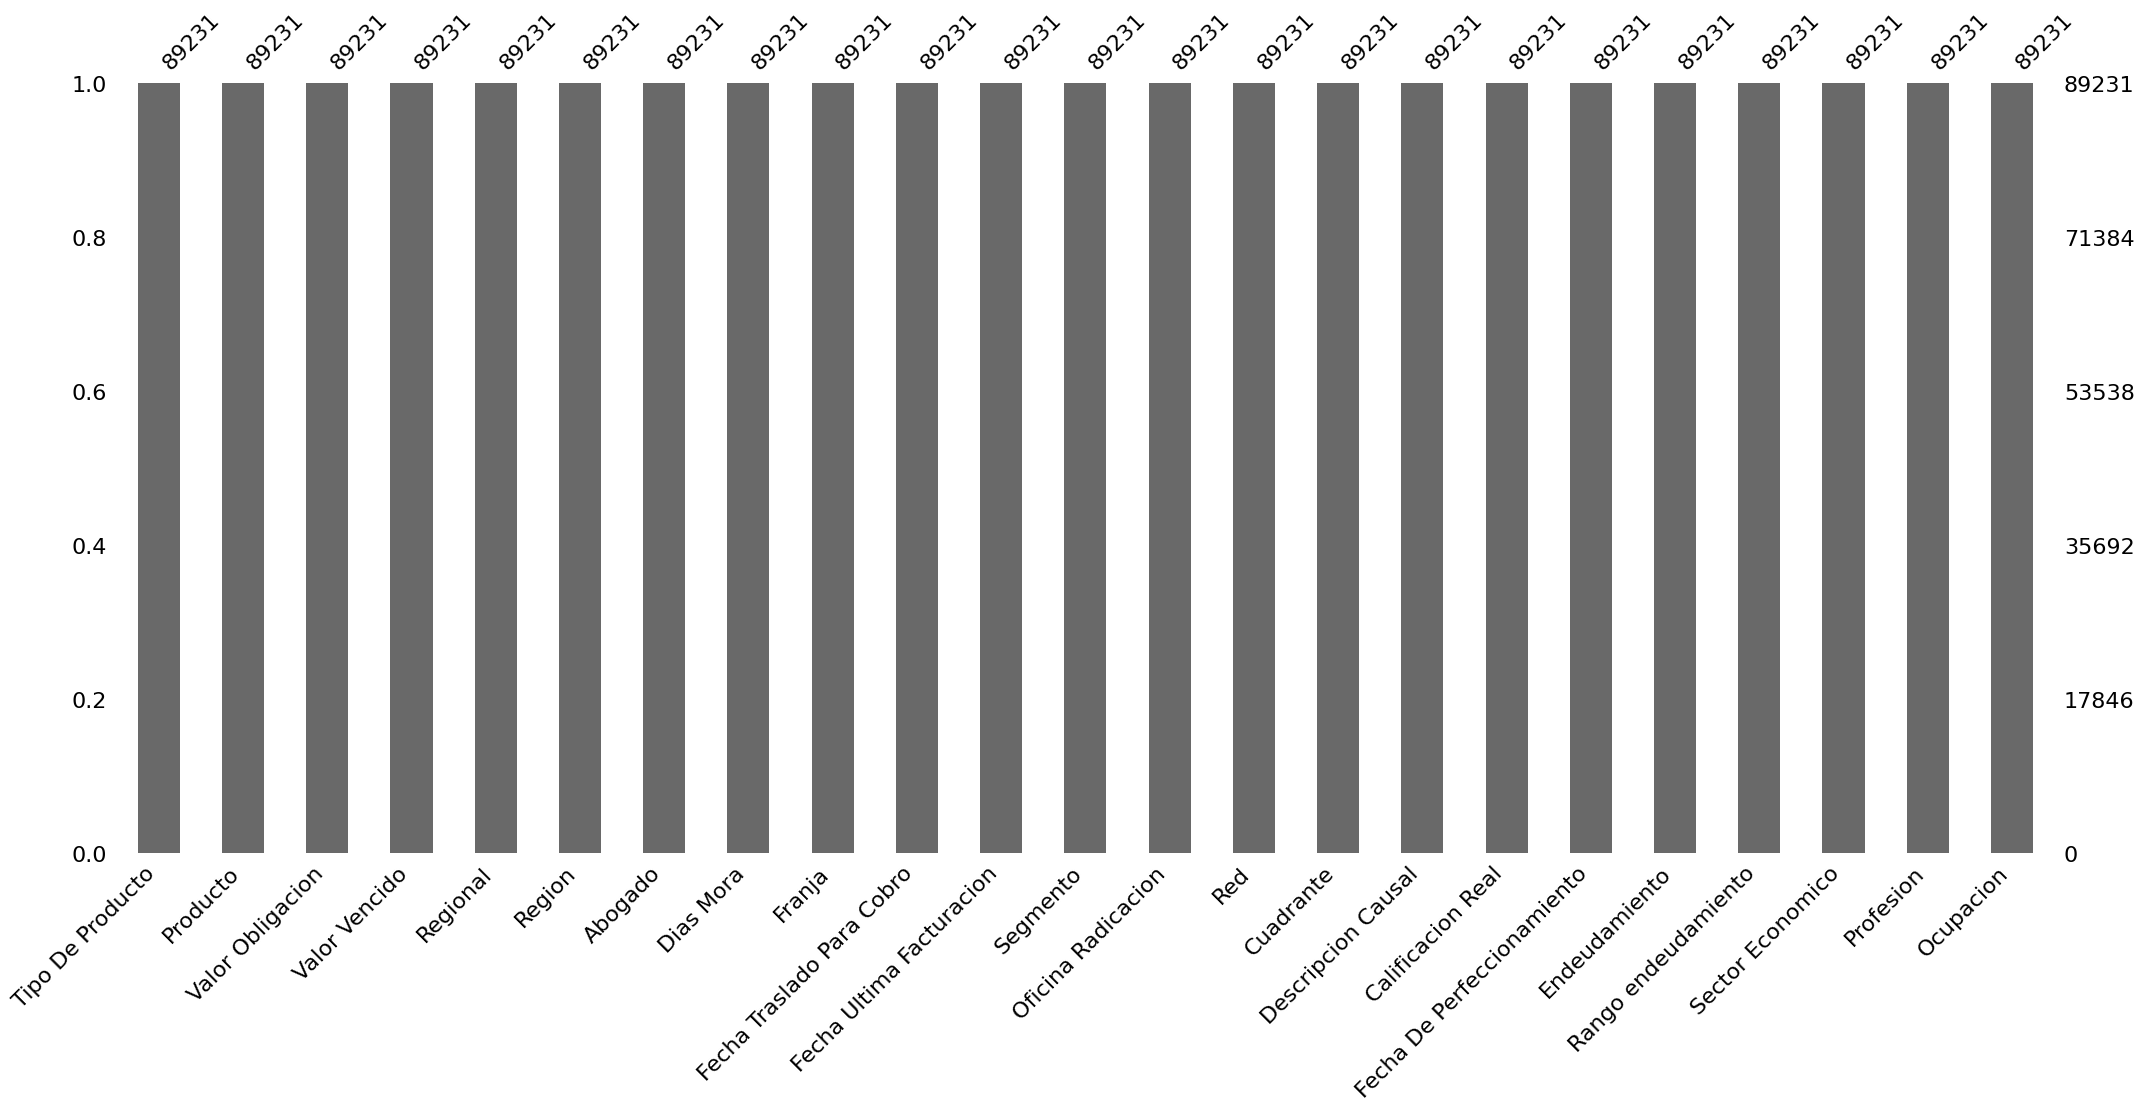

In [429]:
msno.bar(data)

In [416]:
# Hago un agrupamiento y sumatoria por la columna de Outlet_Identifier para analizar
data.groupby(['Dias Mora']).sum()

<ipython-input-416-a6ba1854eedf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Dias Mora']).sum()


,Tipo De Producto,Valor Obligacion,Valor Vencido,Regional,Abogado,Oficina Radicacion,Red,Calificacion Real,Endeudamiento
Dias Mora,,,,,,,,,
1,8374,2.303858e+10,4.995180e+08,2783783,93591186,337963,2124,1258,2.842424e+10
2,7347,1.917656e+10,4.255217e+08,2479447,83473214,283059,1881,1185,2.356837e+10
3,6931,1.458655e+10,3.625307e+08,2143285,70605814,251161,1604,1051,1.807719e+10
4,15149,1.997469e+10,7.324687e+08,3728479,114926960,439779,1951,1850,2.991743e+10
5,13376,1.893689e+10,6.043537e+08,3631828,118886134,459875,2052,1961,2.741490e+10
...,...,...,...,...,...,...,...,...,...
1979,89,6.012165e+06,4.514229e+06,7099,109976,115,1,2,2.503487e+07
2010,178,2.086375e+06,2.086375e+06,14198,219952,230,2,4,5.006974e+07
2071,89,1.041773e+07,7.865315e+06,7099,109976,115,1,2,2.503487e+07


In [417]:
data['Rango endeudamiento'].value_counts()

2015-01-01 00:00:00    45693
15-50                  19133
<1M                    18902
50-100                  4340
100-200                  916
>200                     247
Name: Rango endeudamiento, dtype: int64